In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [4]:
df=pd.read_csv('/kaggle/input/imdb-dataset-of-top-1000-movies-and-tv-shows/imdb_top_1000.csv')
df

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


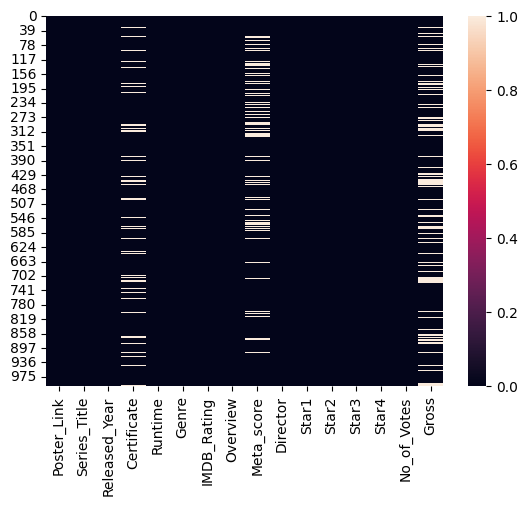

In [6]:
sns.heatmap(df.isnull())
plt.show()

In [7]:
df.dropna(subset= ['Gross'], inplace=True)
df.shape

(831, 16)

In [8]:
df['Certificate'] = df['Certificate'].fillna(df["Certificate"].mode()[0])
df['Meta_score'] = df['Meta_score'].fillna(df["Meta_score"].mode()[0])
df.shape

(831, 16)

In [9]:
df.isnull().sum()

Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

In [10]:
df['Runtime'].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '132 min',
       '169 min', '130 min', '125 min', '189 min', '116 min', '127 min',
       '118 min', '121 min', '207 min', '122 min', '106 min', '112 min',
       '151 min', '150 min', '155 min', '119 min', '110 min', '88 min',
       '137 min', '165 min', '109 min', '102 min', '87 min', '126 min',
       '117 min', '181 min', '149 min', '105 min', '164 min', '170 min',
       '98 min', '101 min', '113 min', '134 min', '229 min', '115 min',
       '147 min', '95 min', '123 min', '131 min', '153 min', '108 min',
       '104 min', '89 min', '81 min', '99 min', '160 min', '114 min',
       '129 min', '228 min', '128 min', '103 min', '143 min', '107 min',
       '68 min', '138 min', '167 min', '163 min', '186 min', '135 min',
       '140 min', '180 min', '158 min', '210 min', '156 min'

In [11]:
df["Runtime"] = df["Runtime"].str.replace(' min', '')
df['Gross'] = df['Gross'].str.replace(',', '')

# Convert the column to integer
df["Runtime"] = df["Runtime"].astype(int)
df['Gross'] = df['Gross'].astype(int)

In [12]:
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2019',
       '2014', '1998', '1997', '1995', '1991', '1977', '1954', '2011',
       '2006', '2000', '1988', '1985', '1968', '1960', '1942', '1936',
       '1931', '2018', '2016', '2017', '2012', '2009', '2007', '1984',
       '1981', '1979', '1964', '1940', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1971', '1965', '1962', '1959', '1958',
       '1952', '1948', '1944', '1941', '1927', '1921', '2015', '2013',
       '2005', '1989', '1963', '1955', '1950', '1925', '1924', '1996',
       '1982', '1978', '1967', '1951', '1949', '1939', '1937', '1934',
       '1928', '1926', '1970', '1969', '1961', '1946', '1930', '1956',
       '1947', '1945', '1938', '1935', '1933', 'PG', '1953'], dtype=object)

In [13]:
df = df.drop(df[df['Released_Year'] == 'PG'].index)
df.shape

(830, 16)

In [14]:
df['Released_Year'] = df['Released_Year'].astype(int)
df['Meta_score'] = df['Meta_score'].astype(int)
df['Gross'] = df['Gross'].astype(int)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    830 non-null    object 
 1   Series_Title   830 non-null    object 
 2   Released_Year  830 non-null    int64  
 3   Certificate    830 non-null    object 
 4   Runtime        830 non-null    int64  
 5   Genre          830 non-null    object 
 6   IMDB_Rating    830 non-null    float64
 7   Overview       830 non-null    object 
 8   Meta_score     830 non-null    int64  
 9   Director       830 non-null    object 
 10  Star1          830 non-null    object 
 11  Star2          830 non-null    object 
 12  Star3          830 non-null    object 
 13  Star4          830 non-null    object 
 14  No_of_Votes    830 non-null    int64  
 15  Gross          830 non-null    int64  
dtypes: float64(1), int64(5), object(10)
memory usage: 110.2+ KB


In [16]:
df=df.drop(['Overview','Poster_Link'], axis=1)
df

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,80,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,Giù la testa,1971,PG,157,"Drama, War, Western",7.6,77,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696690
991,Kelly's Heroes,1970,GP,144,"Adventure, Comedy, War",7.6,50,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,1378435
992,The Jungle Book,1967,U,78,"Animation, Adventure, Family",7.6,65,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,141843612
994,A Hard Day's Night,1964,U,87,"Comedy, Music, Musical",7.6,96,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,13780024


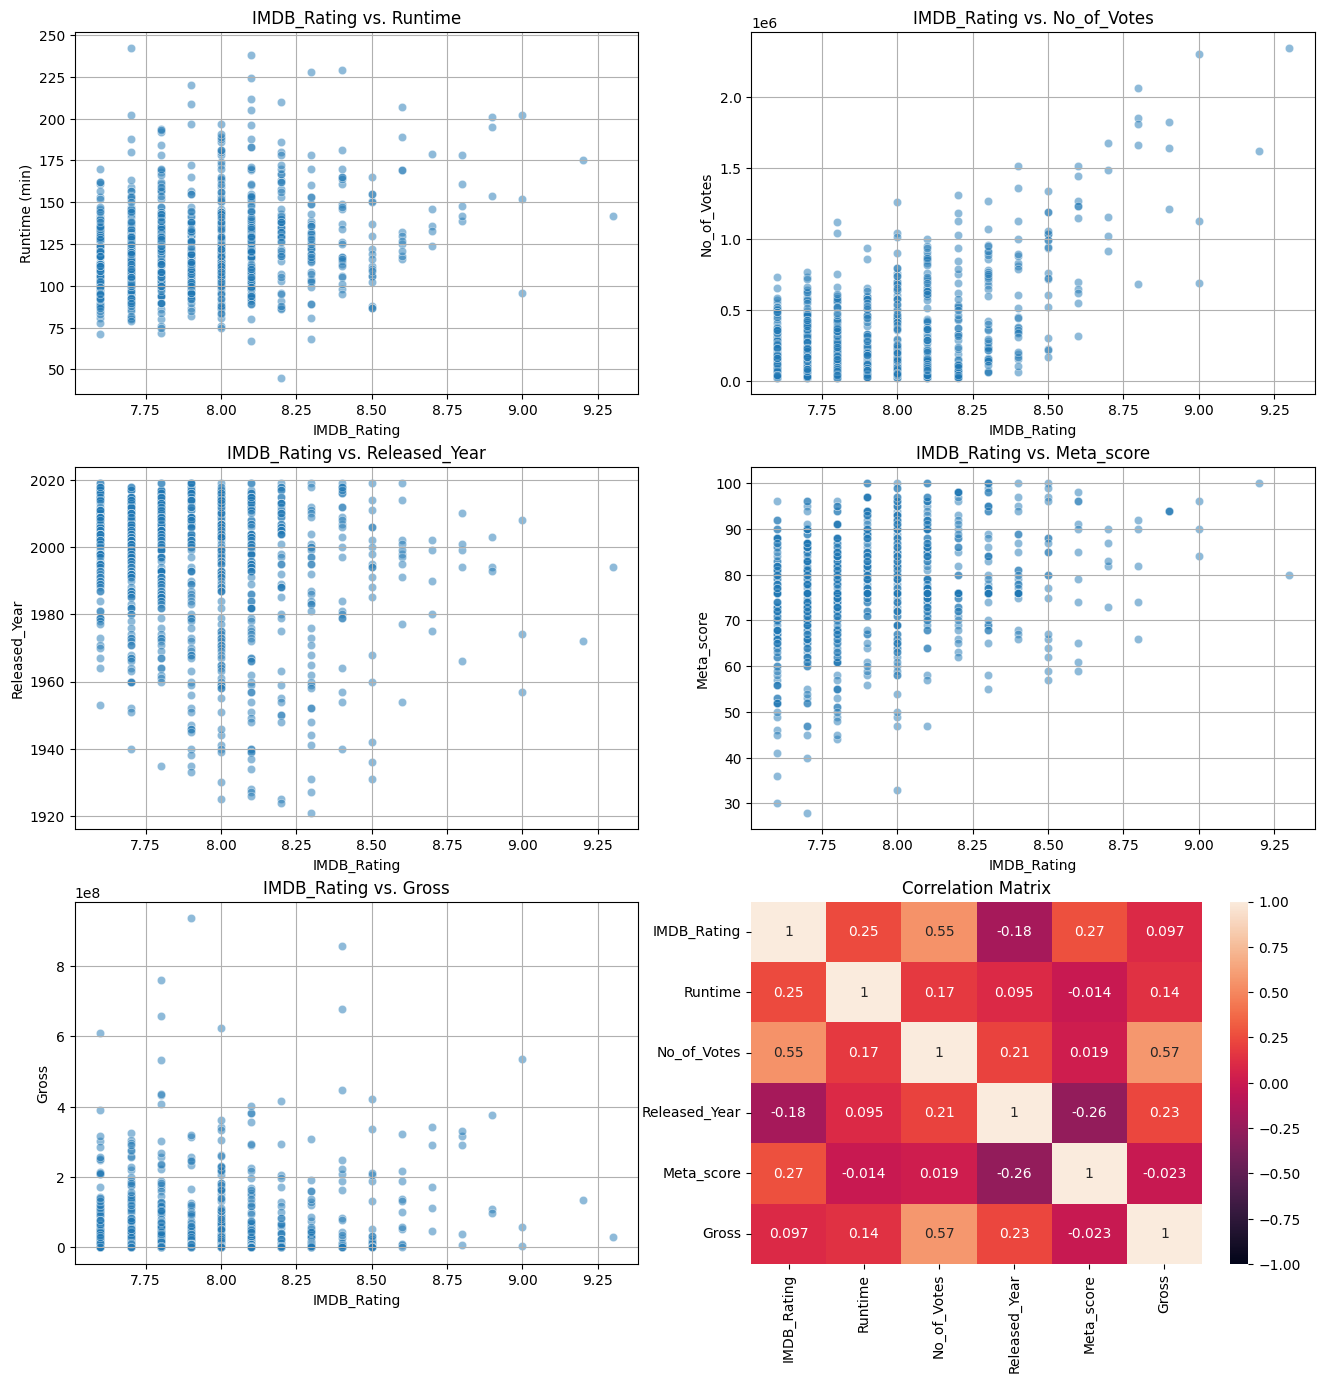

In [17]:
# Scatter plots and Correlation matrix

# Set up the figure and axis
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Duration vs. Rating
sns.scatterplot(x=df['IMDB_Rating'], y=df['Runtime'], alpha=0.5, ax=axes[0, 0])
axes[0, 0].set_title('IMDB_Rating vs. Runtime')
axes[0, 0].set_xlabel('IMDB_Rating')
axes[0, 0].set_ylabel('Runtime (min)')
axes[0, 0].grid(True)

# Votes vs. Rating
sns.scatterplot(x=df['IMDB_Rating'], y=df['No_of_Votes'], alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('IMDB_Rating vs. No_of_Votes')
axes[0, 1].set_xlabel('IMDB_Rating')
axes[0, 1].set_ylabel('No_of_Votes')
axes[0, 1].grid(True)

# Year vs. Rating
sns.scatterplot(x=df['IMDB_Rating'], y=df['Released_Year'], alpha=0.5, ax=axes[1, 0])
axes[1, 0].set_title('IMDB_Rating vs. Released_Year')
axes[1, 0].set_xlabel('IMDB_Rating')
axes[1, 0].set_ylabel('Released_Year')
axes[1, 0].grid(True)

# Year vs. Rating
sns.scatterplot(x=df['IMDB_Rating'], y=df['Meta_score'], alpha=0.5, ax=axes[1, 1])
axes[1, 1].set_title('IMDB_Rating vs. Meta_score')
axes[1, 1].set_xlabel('IMDB_Rating')
axes[1, 1].set_ylabel('Meta_score')
axes[1, 1].grid(True)

# Year vs. Rating
sns.scatterplot(x=df['IMDB_Rating'], y=df['Gross'], alpha=0.5, ax=axes[2, 0])
axes[2, 0].set_title('IMDB_Rating vs. Gross')
axes[2, 0].set_xlabel('IMDB_Rating')
axes[2, 0].set_ylabel('Gross')
axes[2, 0].grid(True)

# Correlation matrix
numeric_features = df[['IMDB_Rating', 'Runtime', 'No_of_Votes', 'Released_Year', 'Meta_score', 'Gross']]
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1, ax=axes[2, 1])
axes[2, 1].set_title('Correlation Matrix')

plt.show()

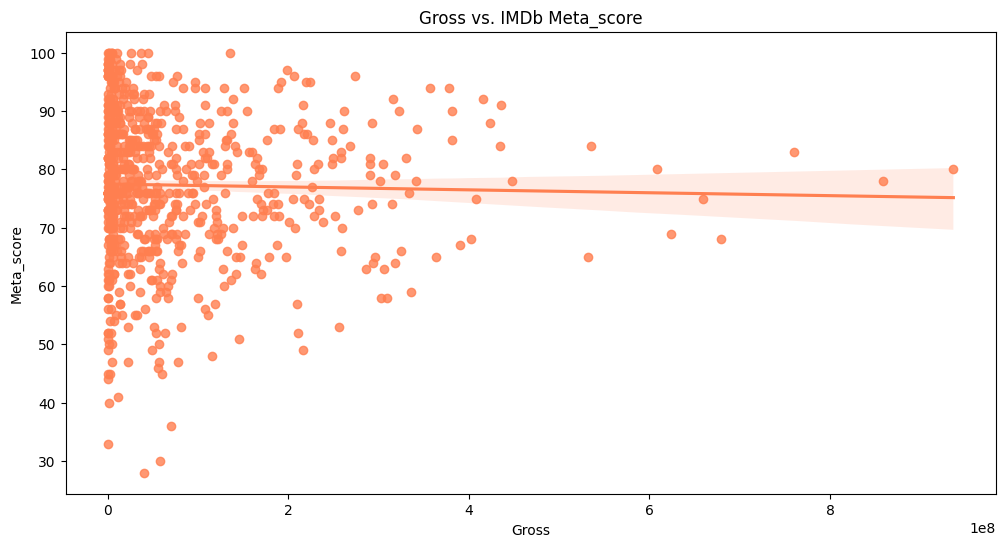

In [18]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['Meta_score'], color='coral')
plt.title('Gross vs. IMDb Meta_score')
plt.xlabel('Gross')
plt.ylabel('Meta_score')
plt.show()

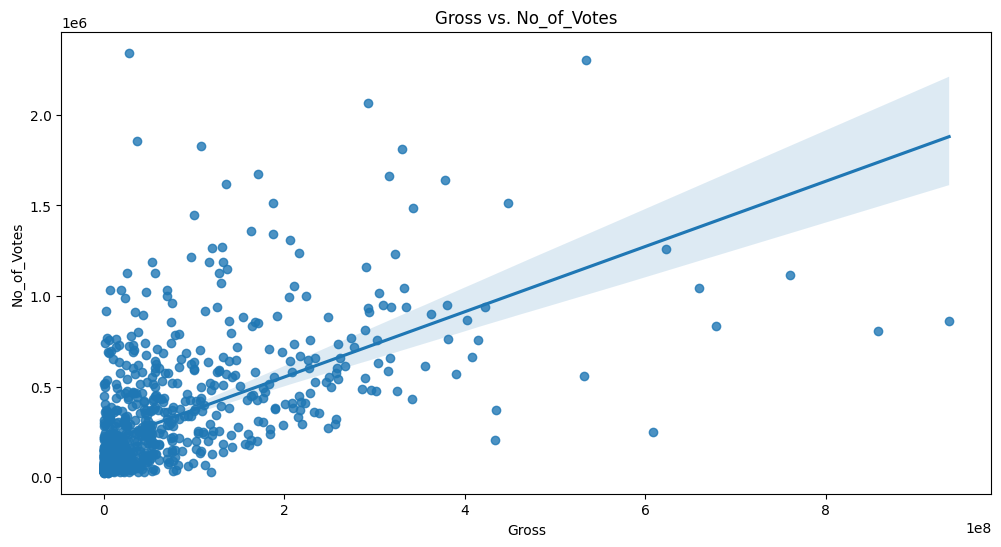

In [19]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['No_of_Votes'])
plt.title('Gross vs. No_of_Votes')
plt.xlabel('Gross')
plt.ylabel('No_of_Votes')
plt.show()

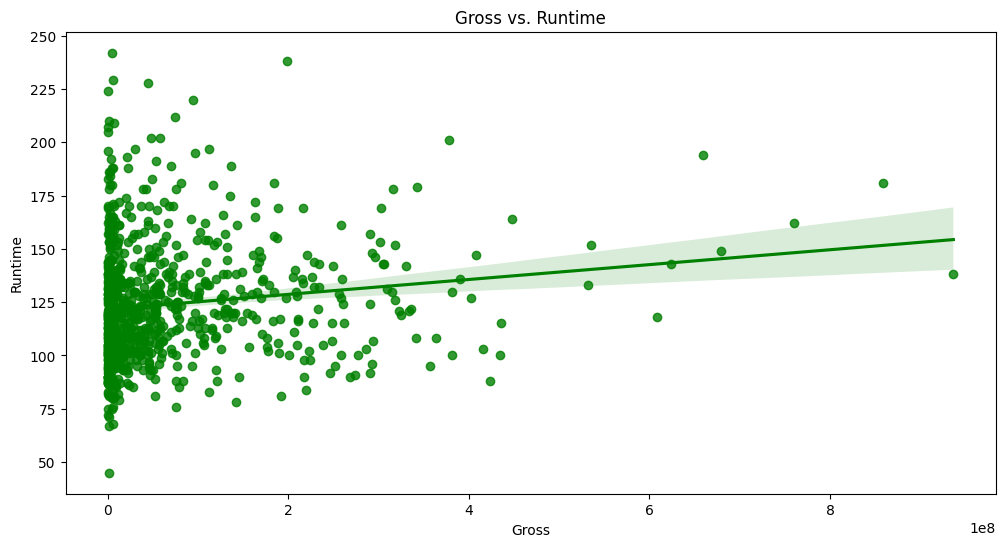

In [20]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['Runtime'], color='green')
plt.title('Gross vs. Runtime')
plt.xlabel('Gross')
plt.ylabel('Runtime')
plt.show()

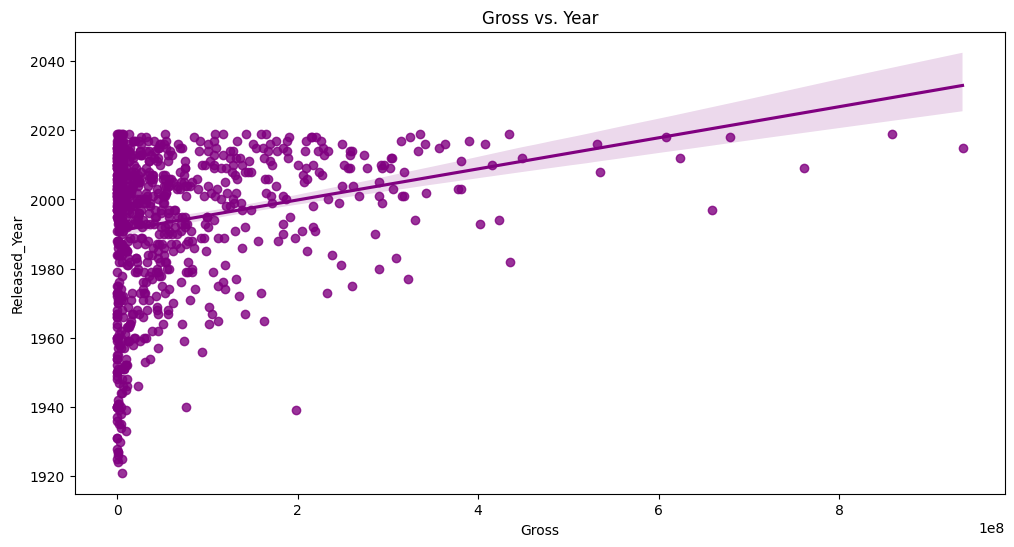

In [21]:
plt.figure(figsize=(12,6))
sns.regplot(x=df['Gross'], y=df['Released_Year'], color='purple')
plt.title('Gross vs. Year')
plt.xlabel('Gross')
plt.ylabel('Released_Year')
plt.show()

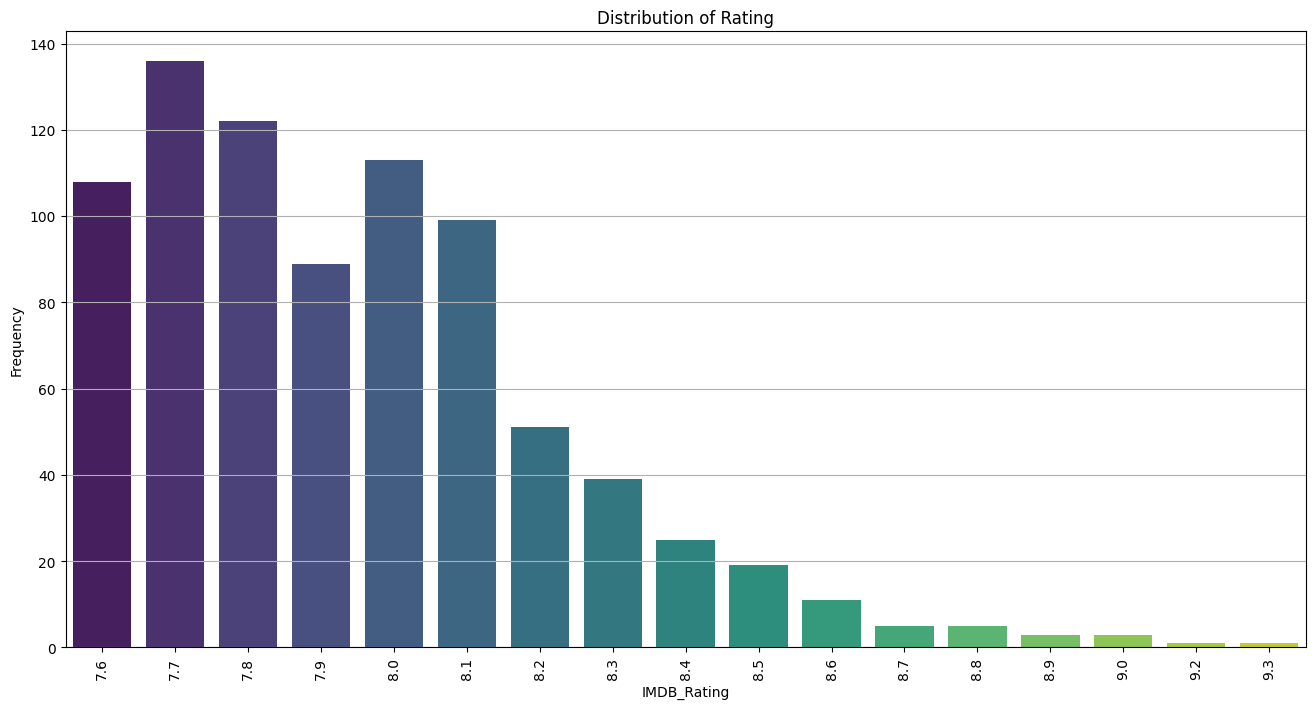

In [22]:
Distribution_Rating = df['IMDB_Rating'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Rating")
plt.xlabel('IMDB_Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

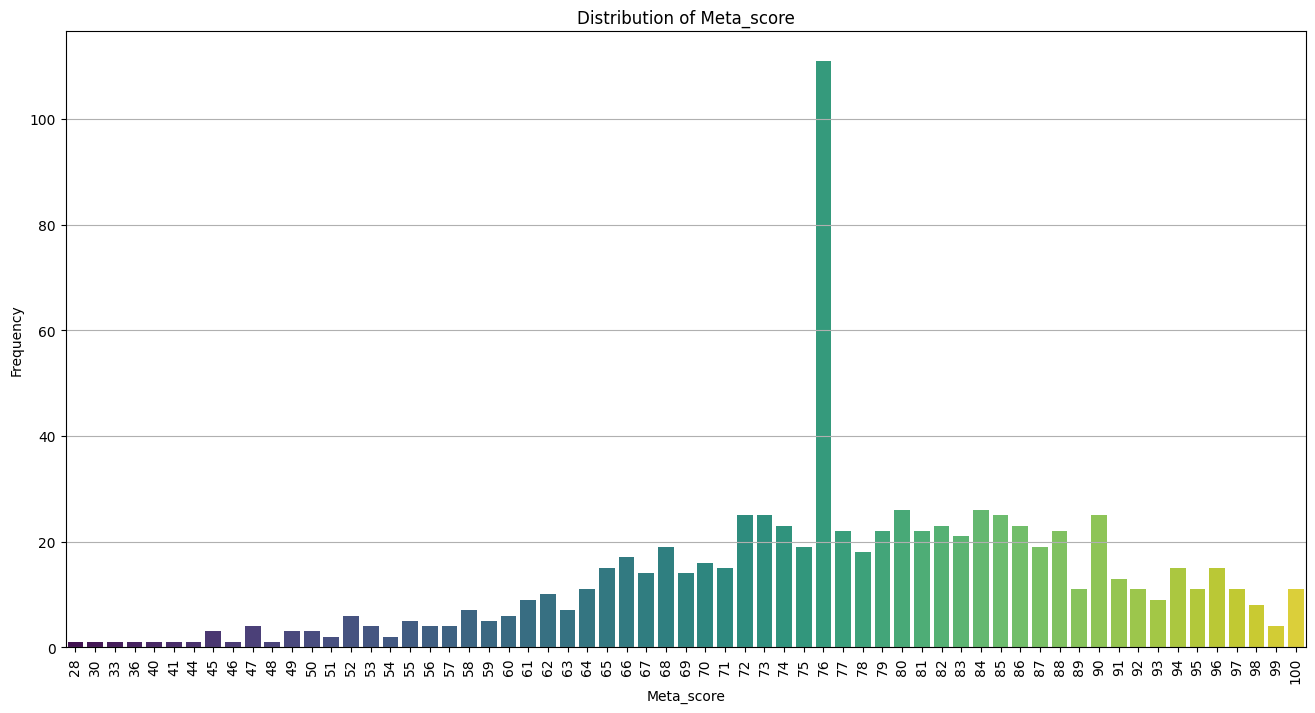

In [23]:
Distribution_Rating = df['Meta_score'].value_counts().sort_index()

plt.figure(figsize=(16, 8))
sns.barplot(x=Distribution_Rating.index, y=Distribution_Rating.values, palette='viridis')
plt.title("Distribution of Meta_score")
plt.xlabel('Meta_score')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.show()

In [24]:
df['Meta_score'].mode()

0    76
Name: Meta_score, dtype: int64

In [25]:
fig = px.area(df, x='Released_Year', y='Gross', hover_data=['Gross', 'Released_Year'])
fig.update_layout(
    title='Gross trends over the years',
    xaxis_title="Year",
    yaxis_title="Gross", 
)
fig.show()

In [26]:
fig = px.area(df, x='Released_Year', y='Runtime', hover_data=['Runtime', 'Released_Year'])
fig.update_layout(
    title='Runtime trends over the years',
    xaxis_title="Year",
    yaxis_title="Runtime", 
)
fig.show()

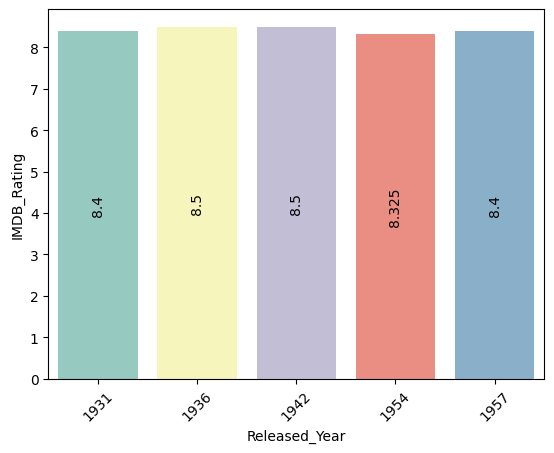

In [27]:
#5 years most rated
fig, axes = plt.subplots()
grouped = df.groupby("Released_Year")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sns.barplot(x=mean1.index[:5], y=mean1.iloc[:5, 0].values, ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.ylabel('IMDB_Rating')
plt.show()

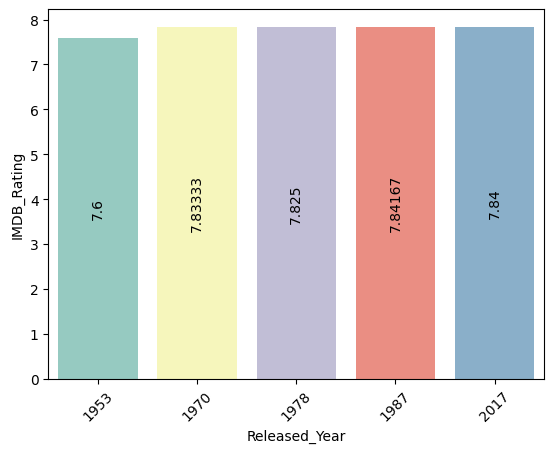

In [28]:
#5 years less rated
fig, axes = plt.subplots()
grouped = df.groupby("Released_Year")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=True)
sns.barplot(x=mean1.index[:5], y=mean1.iloc[:5, 0].values, ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=45)
plt.ylabel('IMDB_Rating')
plt.show()

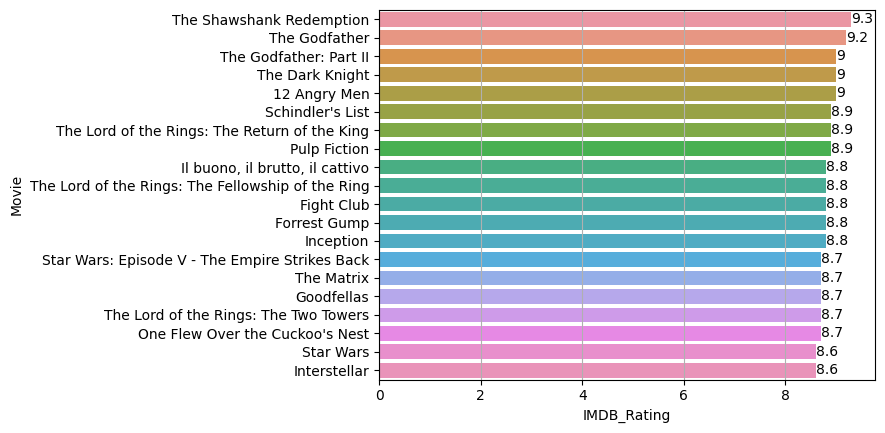

In [29]:
#20 movies most rated
fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sns.barplot(y=mean1.index[:20], x=mean1.iloc[:20, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
plt.ylabel('Movie')
plt.xlabel('IMDB_Rating')
plt.grid(True, axis='x')
plt.show()

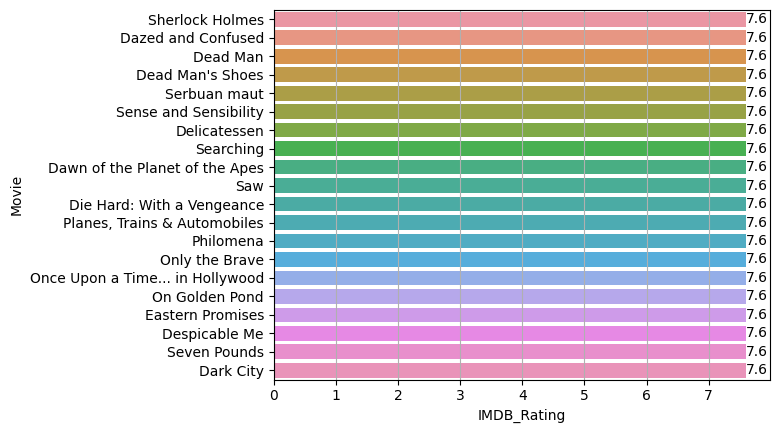

In [30]:
#20 movies less rated
fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=True)
sns.barplot(y=mean1.index[:20], x=mean1.iloc[:20, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
plt.ylabel('Movie')
plt.xlabel('IMDB_Rating')
plt.grid(True, axis='x')
plt.show()

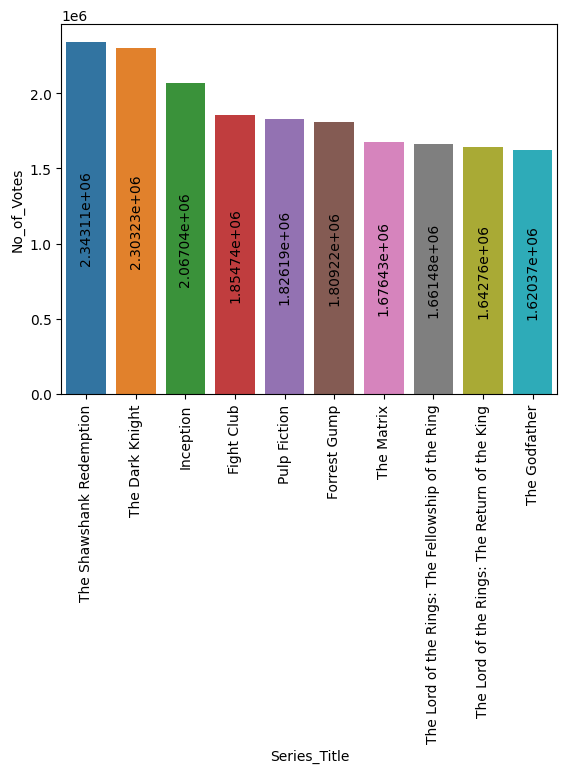

In [31]:
#10 movies most voted

fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=False)
sns.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.ylabel('No_of_Votes')
plt.show()

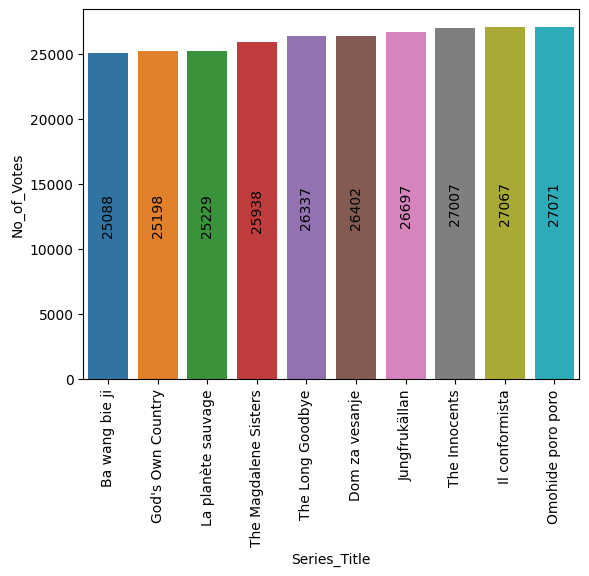

In [32]:
#10 movies less voted

fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=True)
sns.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes)
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.ylabel('No_of_Votes')
plt.show()

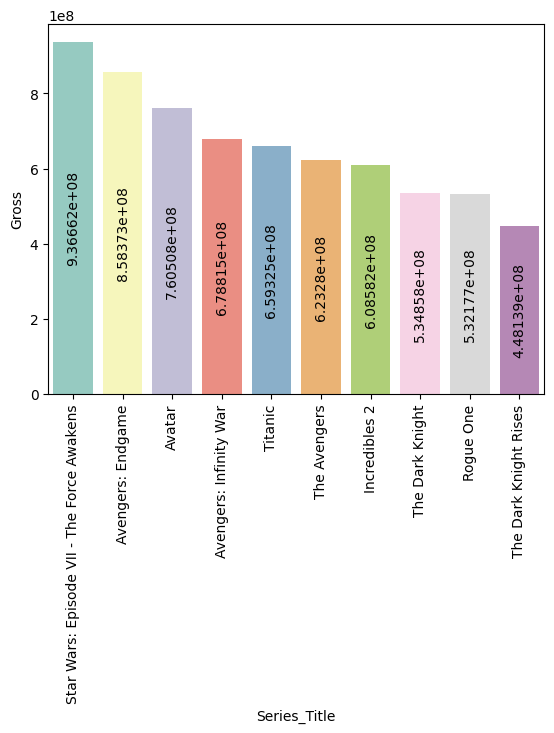

In [33]:
#10 movies with highest gross

fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=False)
sns.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.ylabel('Gross')
plt.show()

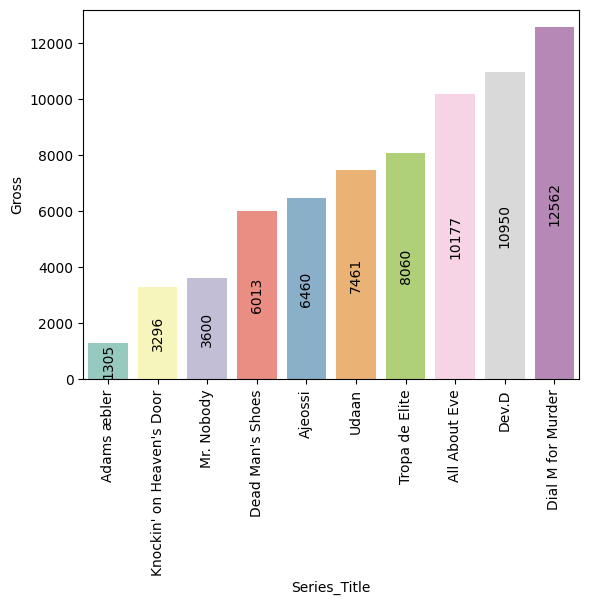

In [34]:
#10 movies with less gross

fig, axes = plt.subplots()
grouped = df.groupby("Series_Title")
mean = pd.DataFrame(grouped["Gross"].mean())
mean1 = mean.sort_values("Gross", ascending=True)
sns.barplot(x=mean1.index[:10], y=mean1.iloc[:10, 0].values, ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center", rotation=90)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.ylabel('Gross')
plt.show()

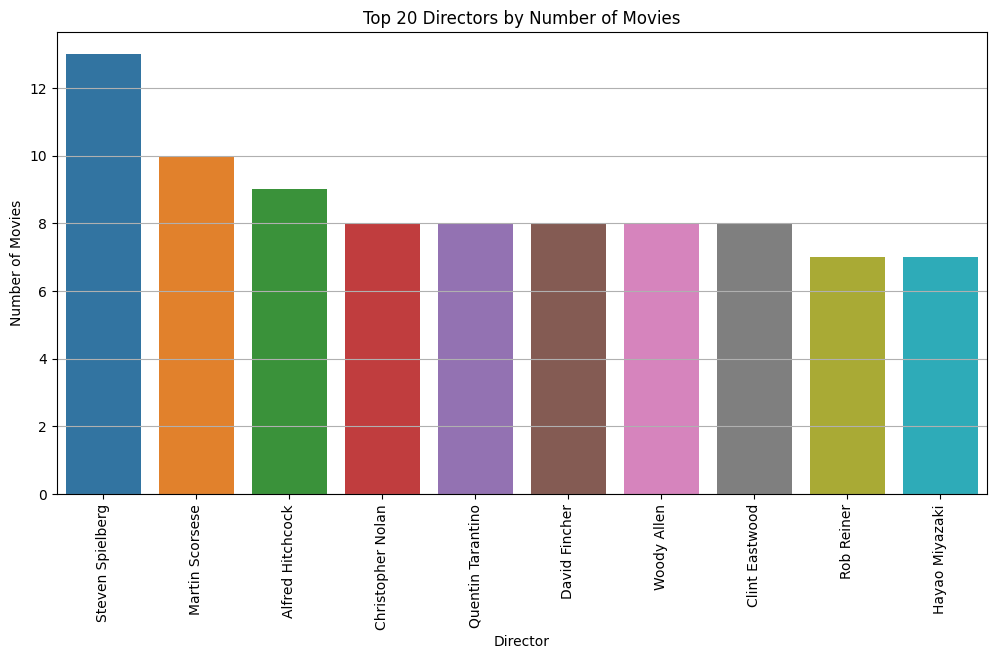

Director
Steven Spielberg     13
Martin Scorsese      10
Alfred Hitchcock      9
Christopher Nolan     8
Quentin Tarantino     8
David Fincher         8
Woody Allen           8
Clint Eastwood        8
Rob Reiner            7
Hayao Miyazaki        7
Name: count, dtype: int64

In [35]:
#Directors with higher number of movies
top_directors = df['Director'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values)
plt.title('Top 20 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.grid(True, axis='y')
plt.xticks(rotation=90)
plt.show()

top_directors

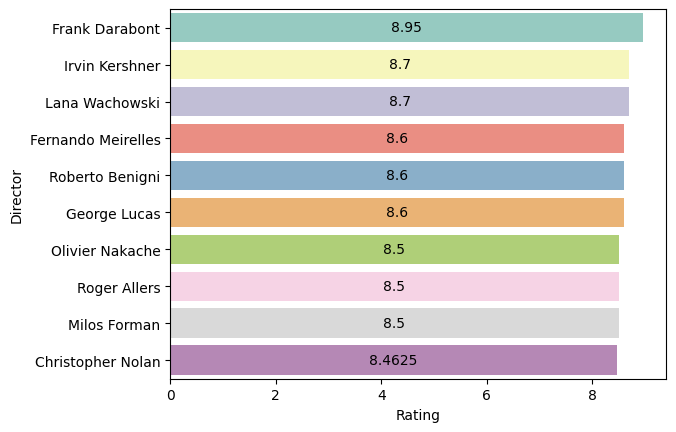

In [36]:
#10 directors most rated
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=False)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center")
#axes.set_xticklabels(axes.get_xticklabels())
plt.xlabel('Rating')
plt.show()

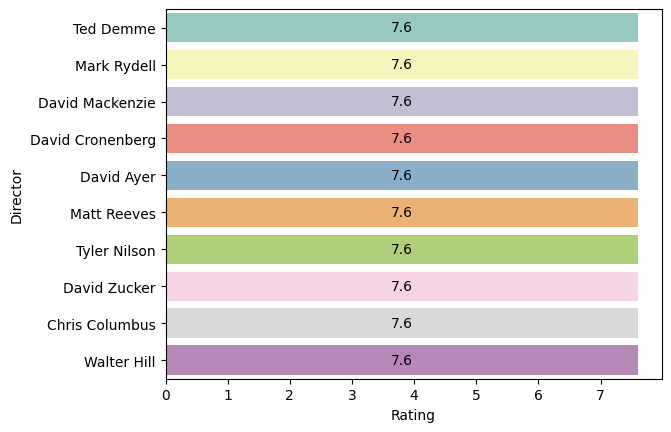

In [37]:
#10 directors less rated
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["IMDB_Rating"].mean())
mean1 = mean.sort_values("IMDB_Rating", ascending=True)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='Set3')
for container in axes.containers:
    axes.bar_label(container, label_type="center")
#axes.set_xticklabels(axes.get_xticklabels())
plt.xlabel('Rating')
plt.show()

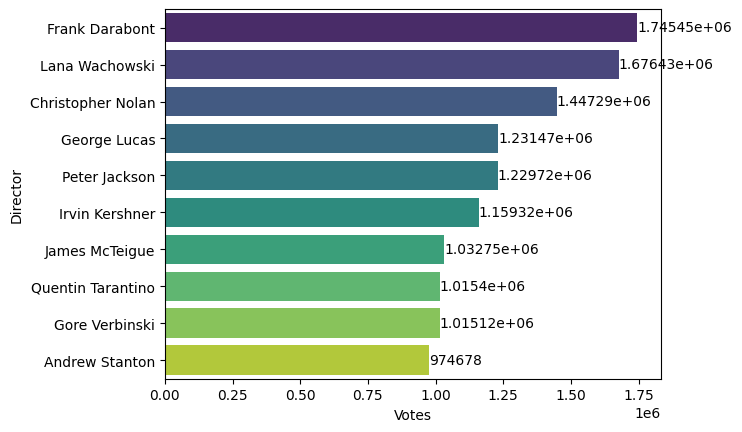

In [38]:
#10 directors most voted
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=False)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='viridis')
for container in axes.containers:
    axes.bar_label(container)
#axes.set_xticklabels(axes.get_xticklabels())
plt.xlabel('Votes')
plt.show()

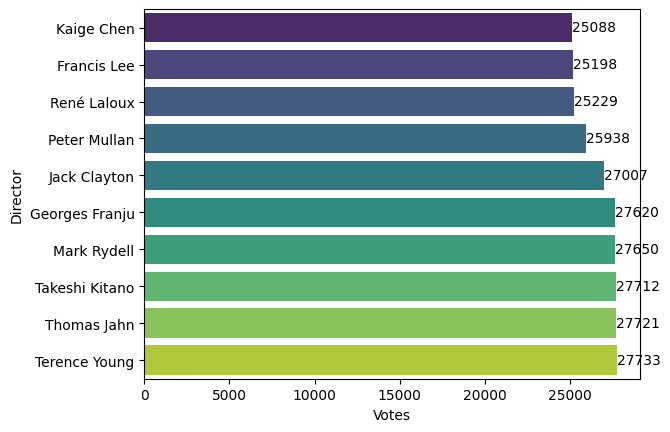

In [39]:
#10 directors less voted
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["No_of_Votes"].mean())
mean1 = mean.sort_values("No_of_Votes", ascending=True)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='viridis')
for container in axes.containers:
    axes.bar_label(container)
#axes.set_xticklabels(axes.get_xticklabels())
plt.xlabel('Votes')
plt.show()

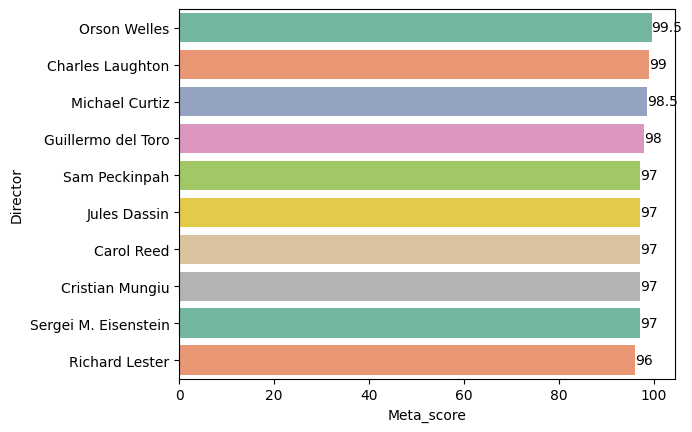

In [40]:
#10 directors with highest meta_score
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Meta_score"].mean())
mean1 = mean.sort_values("Meta_score", ascending=False)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='Set2')
for container in axes.containers:
    axes.bar_label(container)
#axes.set_xticklabels(axes.get_xticklabels())
plt.xlabel('Meta_score')
plt.show()

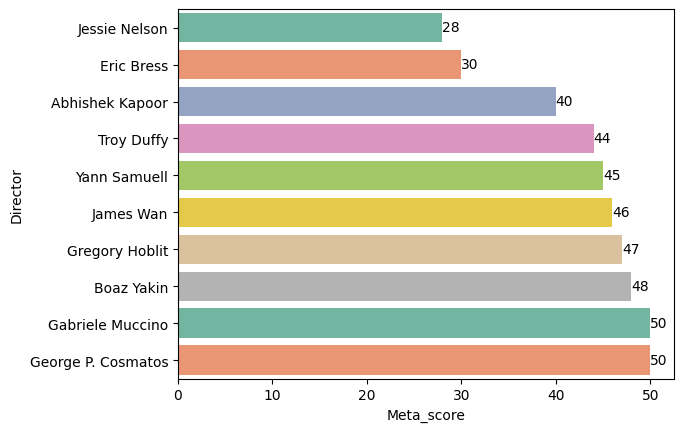

In [41]:
#10 directors with less meta_score
fig, axes = plt.subplots()
grouped = df.groupby("Director")
mean = pd.DataFrame(grouped["Meta_score"].mean())
mean1 = mean.sort_values("Meta_score", ascending=True)
sns.barplot(x=mean1.iloc[:10, 0].values, y=mean1.index[:10], ax=axes, palette='Set2')
for container in axes.containers:
    axes.bar_label(container)
#axes.set_xticklabels(axes.get_xticklabels())
plt.xlabel('Meta_score')
plt.show()

In [42]:
# Distribution of certificate
content_type = df.groupby(['Certificate']).size().reset_index(name='counts')
content_type
# Ploting Distribution of certificate
fig = px.pie(content_type, names = 'Certificate',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Certificate',height =  500 , width = 700)
fig.show()

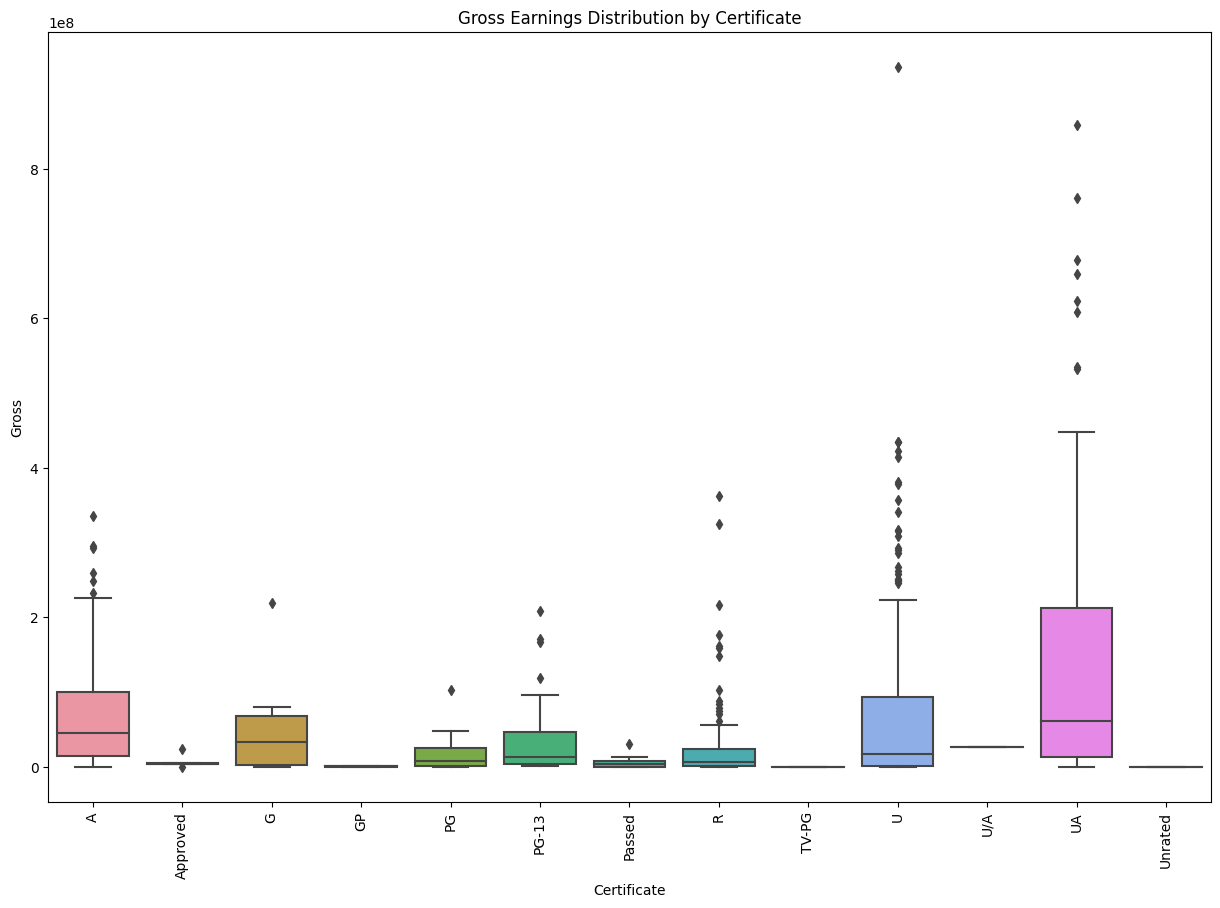

In [43]:
df.dropna(subset=['Certificate', 'Gross'], inplace=True)
df_sorted = df.sort_values('Certificate')
plt.figure(figsize=(15, 10))
sns.boxplot(x='Certificate', y='Gross', data=df_sorted)
plt.title('Gross Earnings Distribution by Certificate')
plt.xlabel('Certificate')
plt.ylabel('Gross')
plt.xticks(rotation=90)
plt.show()

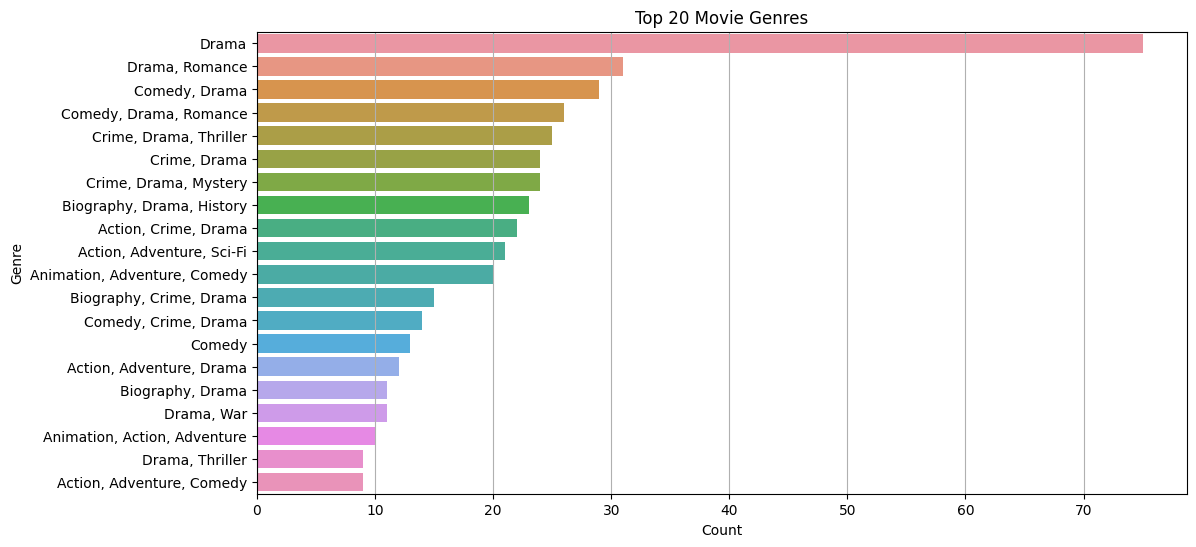

In [44]:
#Distribution of Movie Genres
genre_counts= df['Genre'].value_counts().head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()

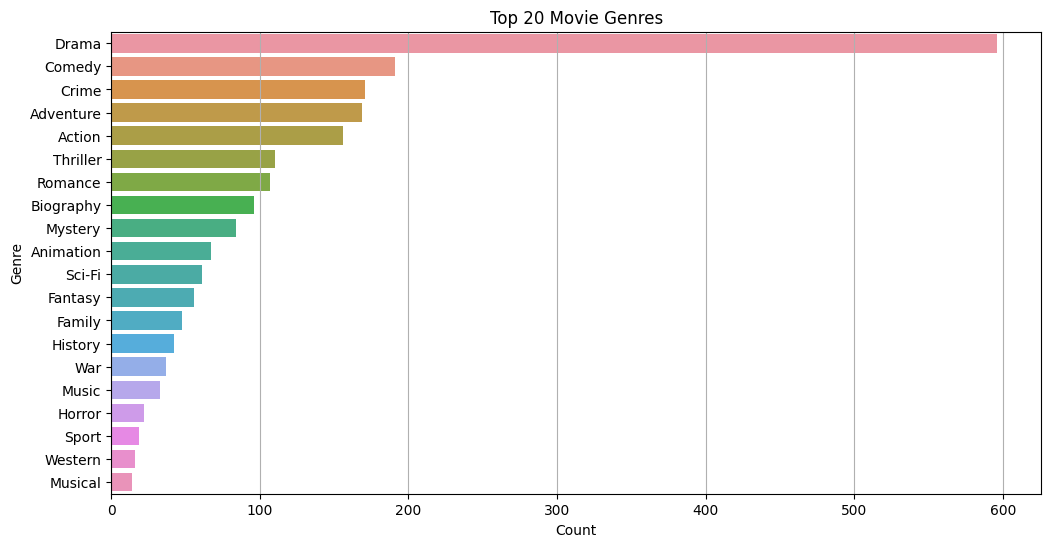

In [45]:
#Distribution of Movie Genres
genre_series = df['Genre'].dropna().apply(lambda x: x.split(', '))
genres = [genre for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(genres).value_counts().head(20)  

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 20 Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.grid(True, axis='x')
plt.show()

In [46]:
fig = px.pie(df, values='IMDB_Rating', names='Genre', hover_data=['Genre'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Rating by Genres')
fig.show()

In [47]:
fig = px.pie(df, values='Meta_score', names='Genre', hover_data=['Genre'])
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title='Meta_score by Genres')
fig.show()

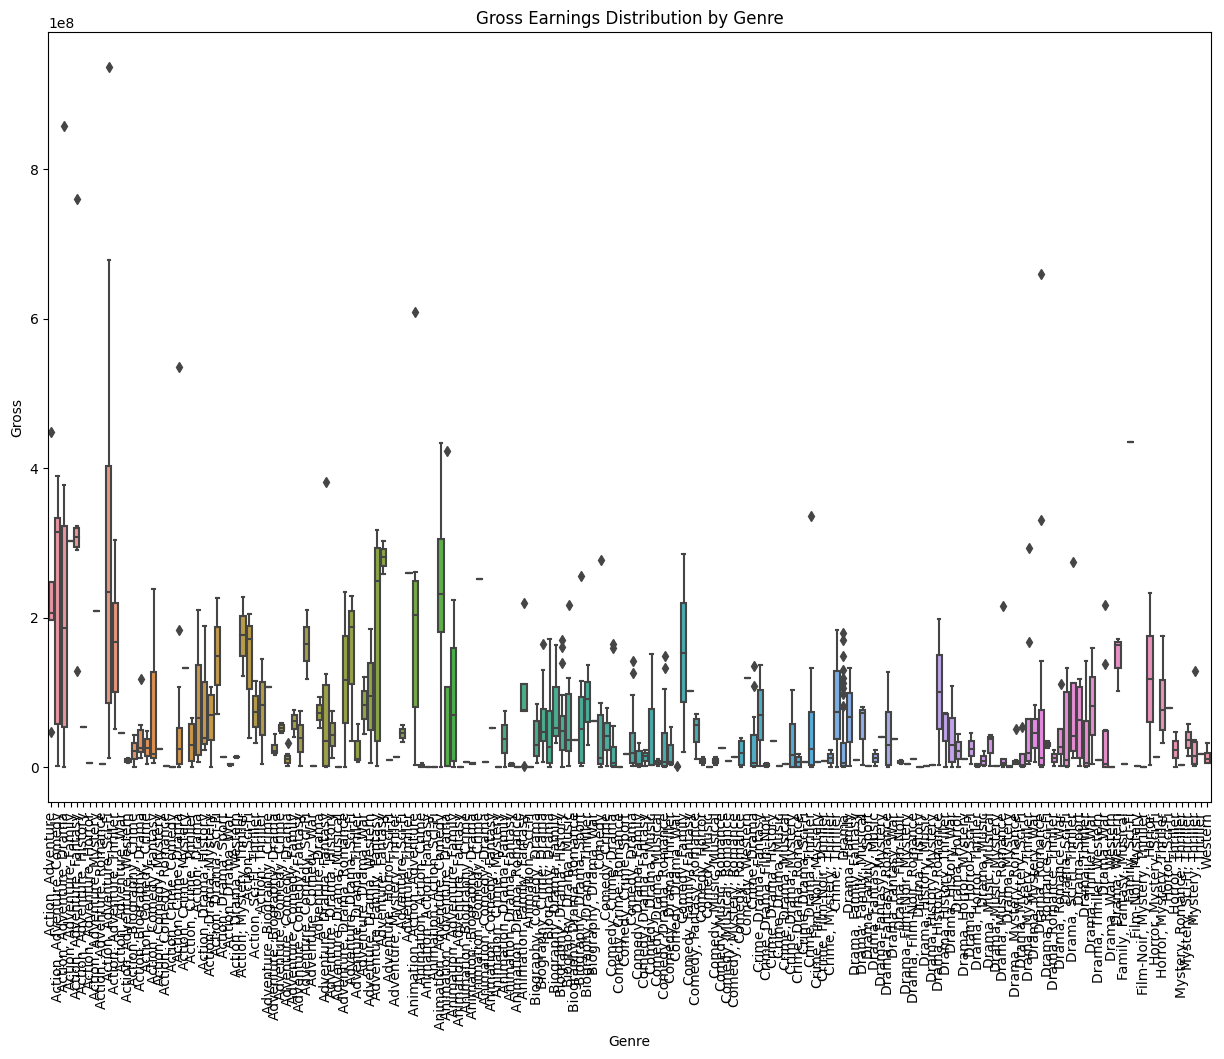

In [48]:
df.dropna(subset=['Genre', 'Gross'], inplace=True)
df_sorted = df.sort_values('Genre')
plt.figure(figsize=(15, 10))
sns.boxplot(x='Genre', y='Gross', data=df_sorted)
plt.title('Gross Earnings Distribution by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross')
plt.xticks(rotation=90)
plt.show()